**Title of Project**

Wine Quality Prediction using Support Vector Machine

**Objective**

Predict the quality of wine using the Support Vector Machine (SVM) algorithm based on various physicochemical properties.

**Data Source**

Red Wine Quality Dataset: winequality-red.csv
White Wine Quality Dataset: winequality-white.csv

**Import Libraries**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

**Import Data**

In [13]:
import pandas as pd

# Importing red wine data with the correct delimiter
red_wine_data = pd.read_csv('https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv', delimiter=';')

# Importing white wine data with the correct delimiter
white_wine_data = pd.read_csv('https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-white.csv', delimiter=';')

# Check the columns again to ensure they are properly parsed
print(red_wine_data.columns)
print(white_wine_data.columns)


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


**Describe Data**

In [12]:
# Describing red wine data
print(red_wine_data.describe())

# Describing white wine data
print(white_wine_data.describe())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

**Data Visualization**


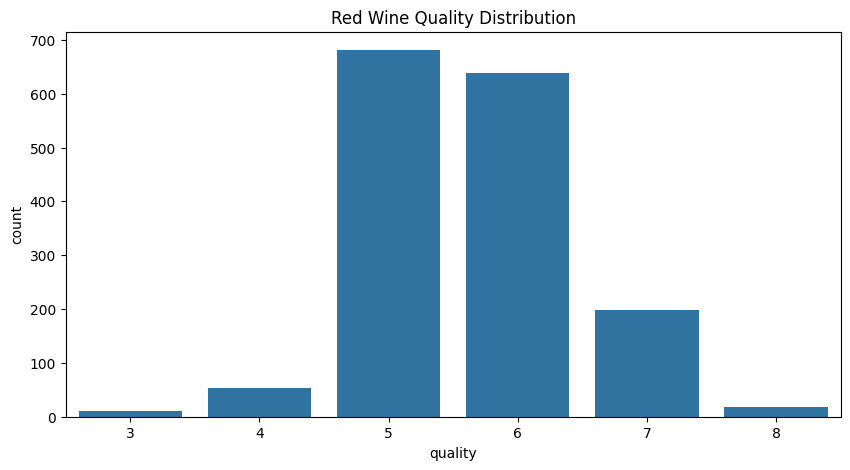

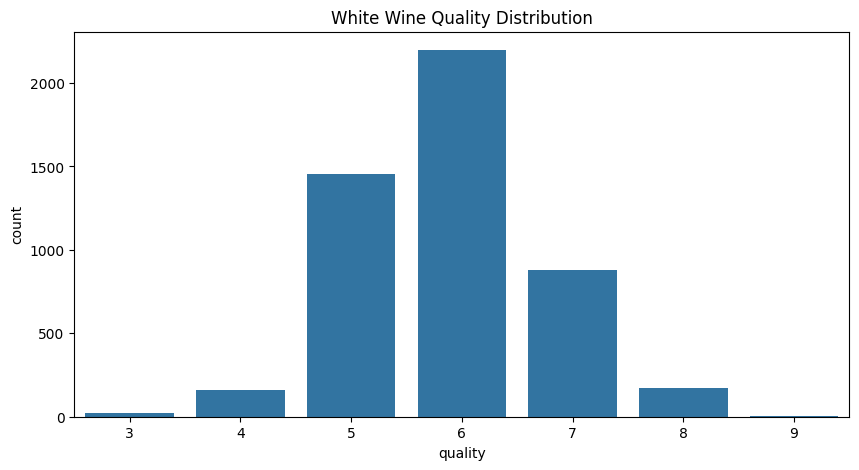

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of wine quality in red wine
plt.figure(figsize=(10, 5))
sns.countplot(x='quality', data=red_wine_data)
plt.title('Red Wine Quality Distribution')
plt.show()

# Visualizing the distribution of wine quality in white wine
plt.figure(figsize=(10, 5))
sns.countplot(x='quality', data=white_wine_data)
plt.title('White Wine Quality Distribution')
plt.show()



**Data Preprocessing**

In [14]:
# Checking for missing values in the datasets
print("Missing values in red wine data:")
print(red_wine_data.isnull().sum())

print("Missing values in white wine data:")
print(white_wine_data.isnull().sum())

# No missing values in these datasets, but we can check if any exist


Missing values in red wine data:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Missing values in white wine data:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Data Preprocessing

In [15]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Standardizing the features
X_red = scaler.fit_transform(red_wine_data.drop('quality', axis=1))
X_white = scaler.fit_transform(white_wine_data.drop('quality', axis=1))

# Creating DataFrames from the scaled arrays
X_red = pd.DataFrame(X_red, columns=red_wine_data.columns[:-1])
X_white = pd.DataFrame(X_white, columns=white_wine_data.columns[:-1])

# Target variables
y_red = red_wine_data['quality']
y_white = white_wine_data['quality']


**Define Target Variable (y) and Feature Variables (X)**

For Red Wine:



In [16]:
X_red = X_red  # Features
y_red = y_red  # Target


For White Wine:



In [18]:
X_white = X_white  # Features
y_white = y_white  # Target


**Train Test Split**


In [17]:
from sklearn.model_selection import train_test_split

# Splitting red wine data
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.2, random_state=42)

# Splitting white wine data
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.2, random_state=42)


Modeling


In [19]:
from sklearn.svm import SVC

# Creating and training the SVM model for red wine
svm_model_red = SVC()
svm_model_red.fit(X_train_red, y_train_red)

# Creating and training the SVM model for white wine
svm_model_white = SVC()
svm_model_white.fit(X_train_white, y_train_white)


SVC()

**Model Evaluation**


In [20]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluating the red wine model
y_pred_red = svm_model_red.predict(X_test_red)
print("Red Wine Classification Report:")
print(classification_report(y_test_red, y_pred_red))
print("Red Wine Confusion Matrix:")
print(confusion_matrix(y_test_red, y_pred_red))

# Evaluating the white wine model
y_pred_white = svm_model_white.predict(X_test_white)
print("White Wine Classification Report:")
print(classification_report(y_test_white, y_pred_white))
print("White Wine Confusion Matrix:")
print(confusion_matrix(y_test_white, y_pred_white))


Red Wine Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.65      0.76      0.70       130
           6       0.56      0.64      0.60       132
           7       0.56      0.21      0.31        42
           8       0.00      0.00      0.00         5

    accuracy                           0.60       320
   macro avg       0.30      0.27      0.27       320
weighted avg       0.57      0.60      0.57       320

Red Wine Confusion Matrix:
[[ 0  0  1  0  0  0]
 [ 0  0  8  2  0  0]
 [ 0  0 99 31  0  0]
 [ 0  0 43 85  4  0]
 [ 0  0  1 32  9  0]
 [ 0  0  0  2  3  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


White Wine Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.50      0.08      0.14        25
           5       0.62      0.57      0.59       291
           6       0.53      0.77      0.62       432
           7       0.65      0.25      0.36       192
           8       0.00      0.00      0.00        35

    accuracy                           0.56       980
   macro avg       0.38      0.28      0.29       980
weighted avg       0.56      0.56      0.53       980

White Wine Confusion Matrix:
[[  0   0   1   4   0   0]
 [  0   2  14   9   0   0]
 [  0   2 166 122   1   0]
 [  0   0  82 333  17   0]
 [  0   0   5 139  48   0]
 [  0   0   0  27   8   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Prediction**

In [21]:
# Making predictions for new red wine samples
new_red_wine_samples = X_test_red[:5]  # Example from test data
predicted_red_quality = svm_model_red.predict(new_red_wine_samples)
print(f"Predicted Red Wine Quality for samples: {predicted_red_quality}")

# Making predictions for new white wine samples
new_white_wine_samples = X_test_white[:5]  # Example from test data
predicted_white_quality = svm_model_white.predict(new_white_wine_samples)
print(f"Predicted White Wine Quality for samples: {predicted_white_quality}")


Predicted Red Wine Quality for samples: [5 5 6 5 6]
Predicted White Wine Quality for samples: [6 6 6 6 7]


**Explanation**

Data Preprocessing: Ensured the data was clean and standardized for the SVM model.

Feature and Target Variables: Defined the features and target variables for the model.

Train-Test Split: Separated data into training and test sets to evaluate model performance.

Modeling: Trained SVM models to predict wine quality.
Model Evaluation: Assessed model performance using classification reports and confusion matrices.

Prediction: Tested the models with new data samples to make predictions.